In [1]:
%load_ext autoreload
%autoreload 2
import uproot as ur
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import analysisTools as tools
from helpers import getMatches, getMatchesv2, getRegMatches, getRegMatchesv2, mergeTrees

In [5]:
t1 = tools.loadNano("regIDNoCut_Mchi-48p0_dMchi-16p0_combined.root")

In [6]:
reco,gen = getMatchesv2(t1,2,dRcut=0.1)
reco2,gen2 = getMatchesv2(t1,1,dRcut=0.1)
allgen = ak.concatenate((t1.GenEle,t1.GenPos))
passID = (reco.ID > -0.25) & (reco.pt>1)

# Looking and number of strip/pix hits

In [4]:
p = ak.flatten(t1.LptElectron.numPixHits)
t = ak.flatten(t1.LptElectron.numStripHits)
a = ak.flatten(t1.LptElectron.numTrackerHits)
order = ak.argsort(a)
p = p[order]
a = a[order]
t = t[order]

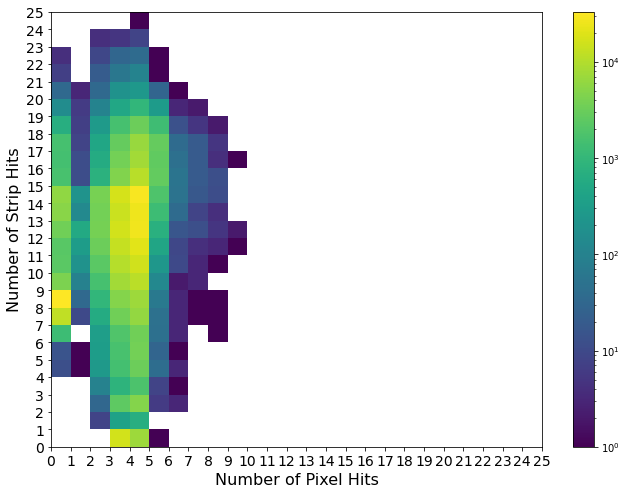

In [5]:
import matplotlib.colors as colors
plt.figure(figsize=(11,8))
bins = np.arange(0,26,step=1)
plt.hist2d(p,t,bins=bins,norm=colors.LogNorm())
plt.yticks(bins,fontsize=14)
plt.xticks(bins,fontsize=14)
plt.colorbar()
plt.xlabel("Number of Pixel Hits",fontsize=16)
plt.ylabel("Number of Strip Hits",fontsize=16)
plt.savefig("lptElectron_numPixStripHits.pdf")

# Compare reg & low pT (with regression)

/uscms_data/d3/sbrightt/miniforge/envs/coffea/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/uscms_data/d3/sbrightt/miniforge/envs/coffea/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


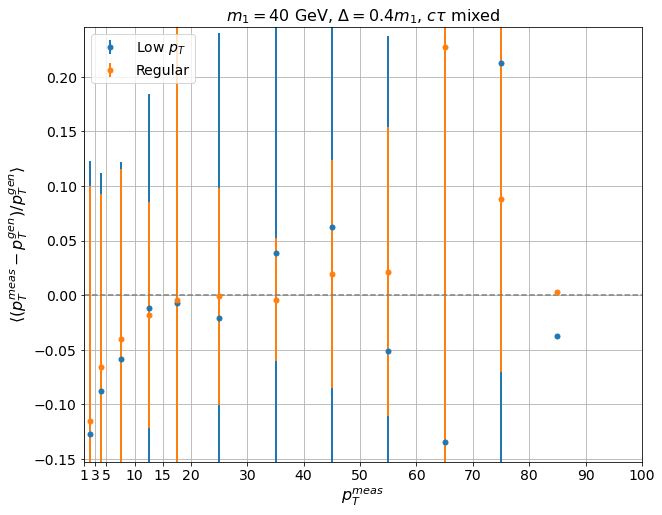

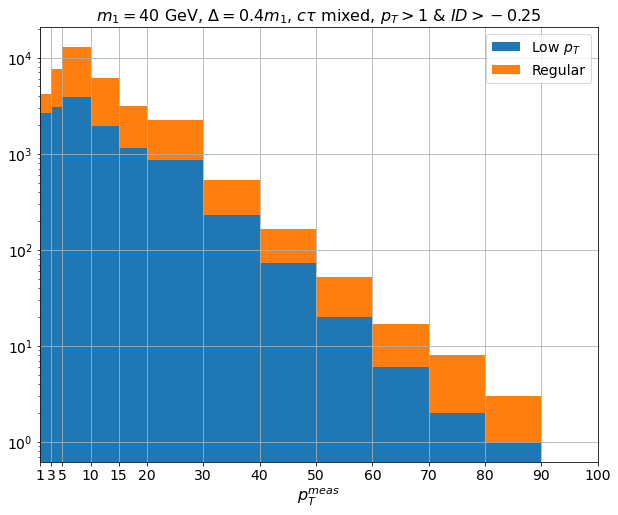

In [7]:
# coarse bins to high pT
passID = (reco.pt>1) & (reco.ID>-0.25)
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,30,40,50,60,70,80,90,100]
pts = [] 
lpt_stds = []
reg_stds = []
lpt_means = []
reg_means = []
lpt_nevs = []
reg_nevs = []
for i in range(len(pt_bins)-1):
    lpt_filt = passID & (reco.pt > pt_bins[i]) & (reco.pt < pt_bins[i+1])
    reg_filt = (reco2.pt > pt_bins[i]) & (reco2.pt < pt_bins[i+1])
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    lpt_diff = (reco.pt[lpt_filt]-gen.pt[lpt_filt])/gen.pt[lpt_filt]
    reg_diff = (reco2.pt[reg_filt]-gen2.pt[reg_filt])/gen2.pt[reg_filt]
    lpt_means.append(ak.mean(lpt_diff))
    reg_means.append(ak.mean(reg_diff))
    lpt_stds.append(ak.std(lpt_diff))
    reg_stds.append(ak.std(reg_diff))
    lpt_nevs.append(ak.count_nonzero(lpt_filt))
    reg_nevs.append(ak.count_nonzero(reg_filt))
plt.errorbar(pts,lpt_means,lpt_stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label=r"Low $p_T$")
plt.errorbar(pts,reg_means,reg_stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label="Regular")
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.ylabel(r"$\langle (p_T^{meas} - p_T^{gen})/p_T^{gen} \rangle$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.xlim((pt_bins[0],pt_bins[-1]))
plt.axhline(0,linestyle='--',color='gray')
plt.legend(loc='upper left',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/ptRes_measVsGen_coarse.pdf")

plt.figure(figsize=(10,8))
h = plt.hist([reco.pt[passID],reco2.pt],bins=pt_bins,label=[r"Low $p_T$","Regular"],stacked=True)
plt.xlim((pt_bins[0],pt_bins[-1]))
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/pT_coarse.pdf")

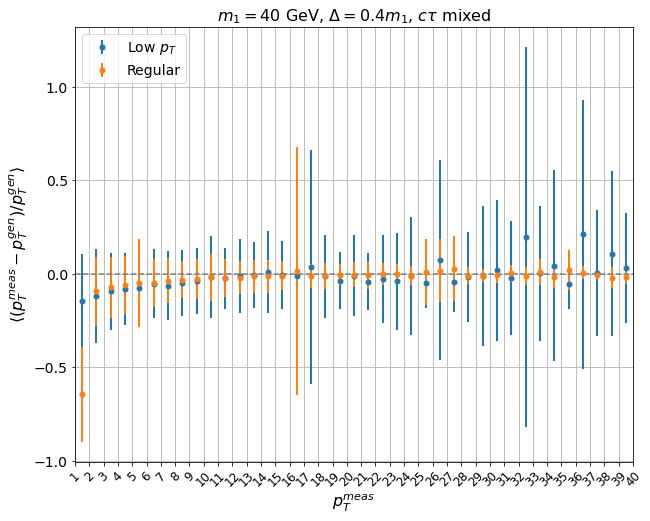

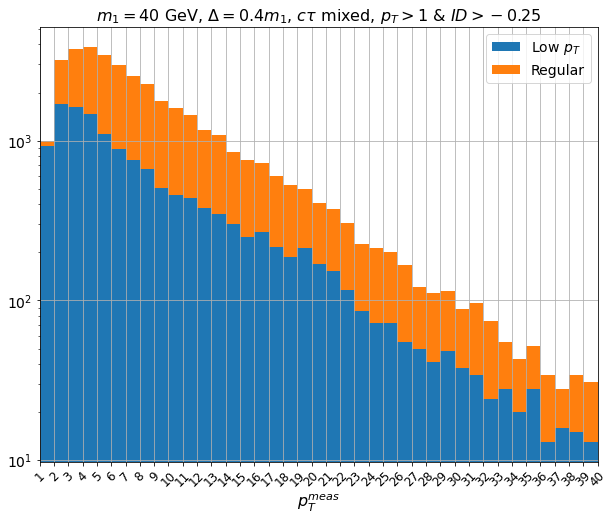

In [8]:
# fine bins to lower pT -- look for cut
passID = (reco.pt>1) & (reco.ID>-0.25)
plt.figure(figsize=(10,8))
pt_bins = np.arange(1,41,step=1)
pts = [] 
lpt_stds = []
reg_stds = []
lpt_means = []
reg_means = []
lpt_nevs = []
reg_nevs = []
for i in range(len(pt_bins)-1):
    lpt_filt = passID & (reco.pt > pt_bins[i]) & (reco.pt < pt_bins[i+1])
    reg_filt = (reco2.pt > pt_bins[i]) & (reco2.pt < pt_bins[i+1])
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    lpt_diff = (reco.pt[lpt_filt]-gen.pt[lpt_filt])/gen.pt[lpt_filt]
    reg_diff = (reco2.pt[reg_filt]-gen2.pt[reg_filt])/gen2.pt[reg_filt]
    lpt_means.append(ak.mean(lpt_diff))
    reg_means.append(ak.mean(reg_diff))
    lpt_stds.append(ak.std(lpt_diff))
    reg_stds.append(ak.std(reg_diff))
    lpt_nevs.append(ak.count_nonzero(lpt_filt))
    reg_nevs.append(ak.count_nonzero(reg_filt))
plt.errorbar(pts,lpt_means,lpt_stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label=r"Low $p_T$")
plt.errorbar(pts,reg_means,reg_stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label="Regular")
plt.xticks(pt_bins,fontsize=12,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.ylabel(r"$\langle (p_T^{meas} - p_T^{gen})/p_T^{gen} \rangle$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.xlim((pt_bins[0],pt_bins[-1]))
plt.axhline(0,linestyle='--',color='gray')
plt.legend(loc='upper left',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/ptRes_measVsGen_fine.pdf")

plt.figure(figsize=(10,8))
h = plt.hist([reco.pt[passID],reco2.pt],bins=pt_bins,label=[r"Low $p_T$","Regular"],stacked=True)
plt.xlim((pt_bins[0],pt_bins[-1]))
plt.xticks(pt_bins,fontsize=12,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/pT_fine.pdf")

# Plots with regular electrons

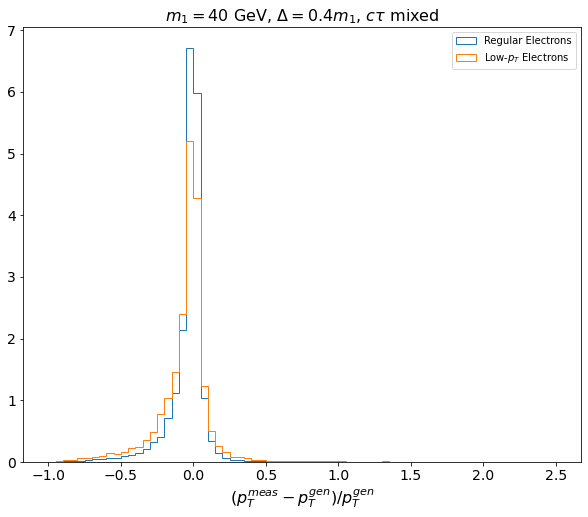

In [19]:
plt.figure(figsize=(10,8))
h = plt.hist((reco2.pt-gen2.pt)/gen2.pt,bins=np.arange(-1,2.55,step=0.05),histtype='step',label="Regular Electrons",density=True)
h = plt.hist((reco.pt[passID]-gen.pt[passID])/gen.pt[passID],bins=np.arange(-1,2.55,step=0.05),histtype='step',label=r"Low-$p_T$ Electrons",density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"($p_T^{meas} - p_T^{gen}$)/$p_T^{gen}$",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.legend(loc='upper right')
plt.savefig("plots/lowpt_performance/regEle_relPtDiff_MeasVsGen.pdf")

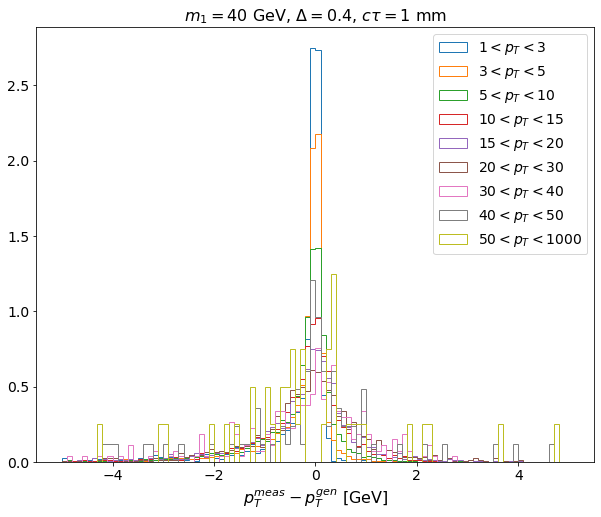

In [20]:
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,30,40,50,1000]
for i in range(len(pt_bins)-1):
    filt = (reco2.pt > pt_bins[i]) & (reco2.pt < pt_bins[i+1])
    h = plt.hist(reco2.pt[filt]-gen2.pt[filt],bins=np.arange(-5,5.1,step=0.1),histtype='step',label=r'${0} < p_T < {1}$'.format(pt_bins[i],pt_bins[i+1]),density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas} - p_T^{gen}$ [GeV]",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
#plt.yscale('log')
plt.savefig("regEle_binned_ptDiff_measVsGen.pdf")

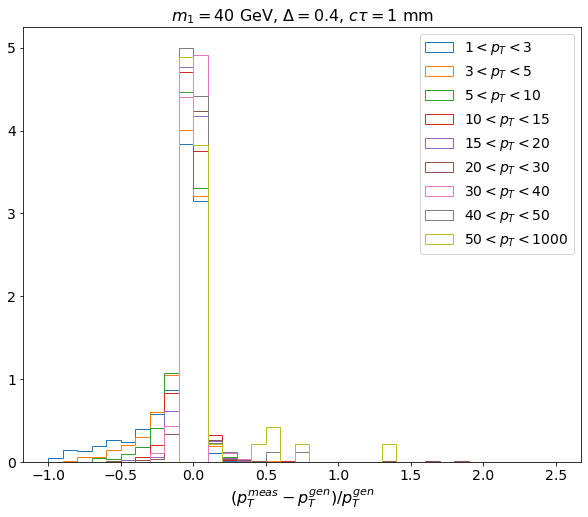

In [21]:
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,30,40,50,1000]
for i in range(len(pt_bins)-1):
    filt = (reco2.pt > pt_bins[i]) & (reco2.pt < pt_bins[i+1])
    h = plt.hist((reco2.pt[filt]-gen2.pt[filt])/gen2.pt[filt],bins=np.arange(-1,2.6,step=0.1),histtype='step',label=r'${0} < p_T < {1}$'.format(pt_bins[i],pt_bins[i+1]),density=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$(p_T^{meas} - p_T^{gen})/p_T^{gen}$",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm",fontsize=16)
#plt.yscale('log')
plt.savefig("regEle_binned_relPtDiff_measVsGen.pdf")

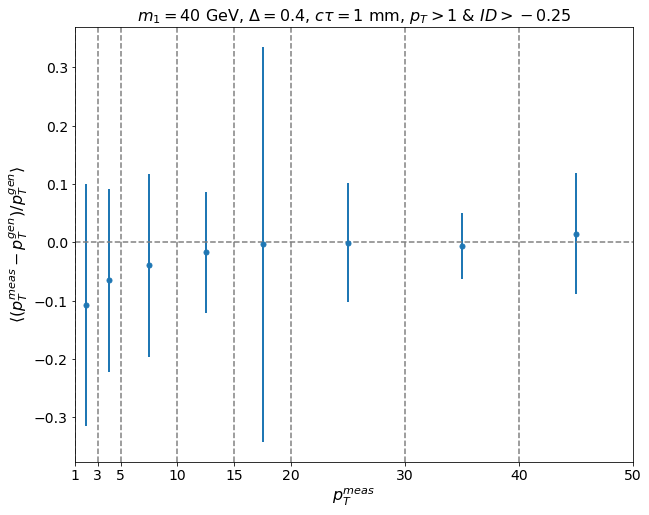

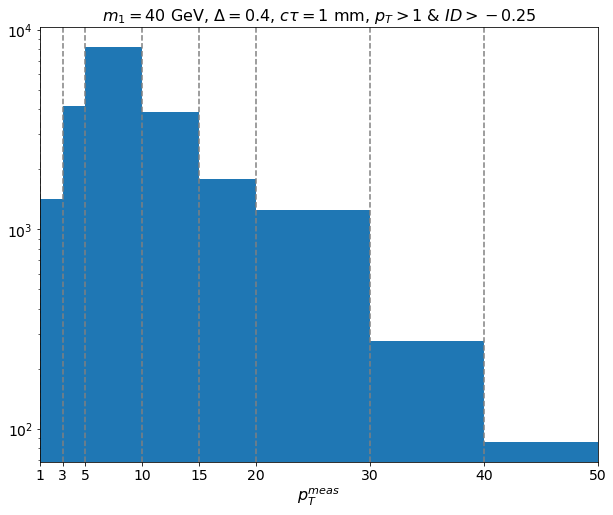

In [22]:
plt.figure(figsize=(10,8))
pt_bins = [1,3,5,10,15,20,30,40,50]
nevs = []
pts = [] 
stds = []
means = []
for i in range(len(pt_bins)-1):
    filt = (reco2.pt > pt_bins[i]) & (reco2.pt < pt_bins[i+1])
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    diff = (reco2.pt[filt]-gen2.pt[filt])/gen2.pt[filt]
    means.append(ak.mean(diff))
    stds.append(ak.std(diff))
    nevs.append(ak.count_nonzero(filt))
plt.errorbar(pts,means,stds,linewidth=0,elinewidth=2,markersize=5,marker='o')
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.ylabel(r"$\langle (p_T^{meas} - p_T^{gen})/p_T^{gen} \rangle$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.xlim((pt_bins[0],pt_bins[-1]))
for binedge in pt_bins[:-1]:
    plt.axvline(binedge,linestyle="--",color='gray')
plt.axhline(0,linestyle='--',color='gray')
plt.savefig("regEle_binned_relPtDiffMeanStd_measVsGen.pdf")

plt.figure(figsize=(10,8))
h = plt.hist(reco2.pt,bins=pt_bins)
plt.xlim((pt_bins[0],pt_bins[-1]))
for binedge in pt_bins[:-1]:
    plt.axvline(binedge,linestyle="--",color='gray')
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{meas}$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4$, $c\tau = 1$ mm, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.savefig("regEle_binned_pt_dist.pdf")

# Look at efficiency/res as a function of gen pT, gen vxy

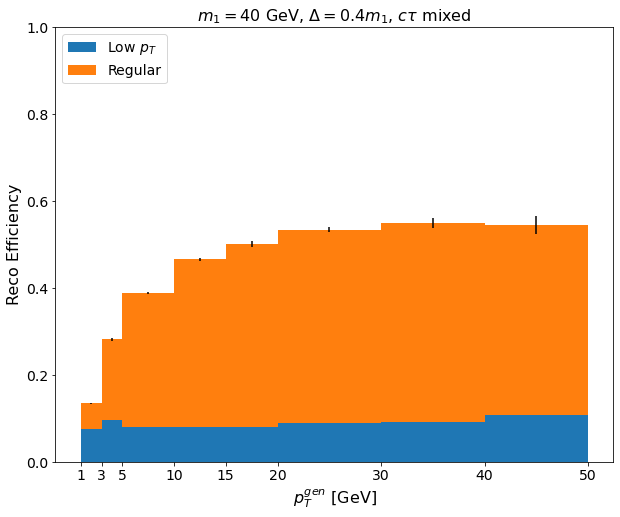

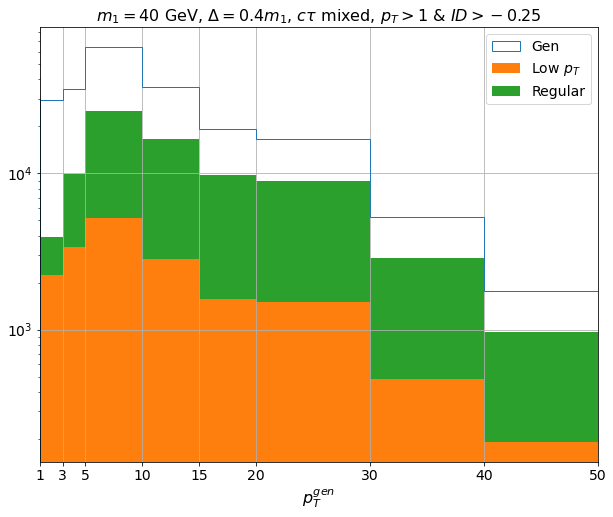

In [7]:
passID = (reco.pt>1) & (reco.ID>-0.25)
pt_bins = [1,3,5,10,15,20,30,40,50]
ngen_tot = len(allgen)
pts = []
lpt_effs = []
lpt_eff_errs = []
lpt_nevs = []
regele_effs = []
regele_eff_errs = []
regele_nevs = []
gen_nevs = []
for i in range(len(pt_bins)-1):
    lpt_filt = passID & (gen.pt > pt_bins[i]) & (gen.pt < pt_bins[i+1])
    reg_filt = (gen2.pt > pt_bins[i]) & (gen2.pt < pt_bins[i+1])
    
    gen_filt = (allgen.pt > pt_bins[i]) & (allgen.pt < pt_bins[i+1])
    ngen = ak.count_nonzero(gen_filt)
    n_lpt = ak.count_nonzero(lpt_filt)
    n_regele = ak.count_nonzero(reg_filt)
    
    gen_nevs.append(ngen)
    lpt_nevs.append(n_lpt)
    regele_nevs.append(n_regele)
    
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    
    lpt_effs.append(n_lpt/ngen)
    lpt_eff_errs.append(lpt_effs[-1]*np.sqrt(1/n_lpt + 1/ngen))
    
    regele_effs.append(n_regele/ngen)
    regele_eff_errs.append(regele_effs[-1]*np.sqrt(1/n_regele + 1/ngen))
    
plt.figure(figsize=(10,8))
tot_errs_lpt = np.sqrt(np.array(lpt_eff_errs)**2 + np.array(regele_eff_errs)**2)
plt.bar(pts,lpt_effs,label=r"Low $p_T$",width=np.array(pt_bins[1:])-np.array(pt_bins[:-1]))
plt.bar(pts,regele_effs,label="Regular",width=np.array(pt_bins[1:])-np.array(pt_bins[:-1]),bottom=lpt_effs,yerr=tot_errs_lpt)
plt.yticks(fontsize=14)
plt.xticks(ticks=pt_bins,fontsize=14)
plt.ylim([0,1])
plt.xlabel(r"$p_T^{gen}$ [GeV]",fontsize=16)
plt.ylabel("Reco Efficiency",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.savefig("plots/lowpt_performance/reco_eff_by_pt_coarse.pdf")

plt.figure(figsize=(10,8))
h = plt.hist(allgen.pt,bins=pt_bins,label="Gen",histtype='step')
h2 = plt.hist([gen.pt[passID],gen2.pt],bins=pt_bins,label=[r"Low $p_T$","Regular"],stacked=True)
plt.xlim((pt_bins[0],pt_bins[-1]))
plt.xticks(pt_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{gen}$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/gen_pT_coarse.pdf")

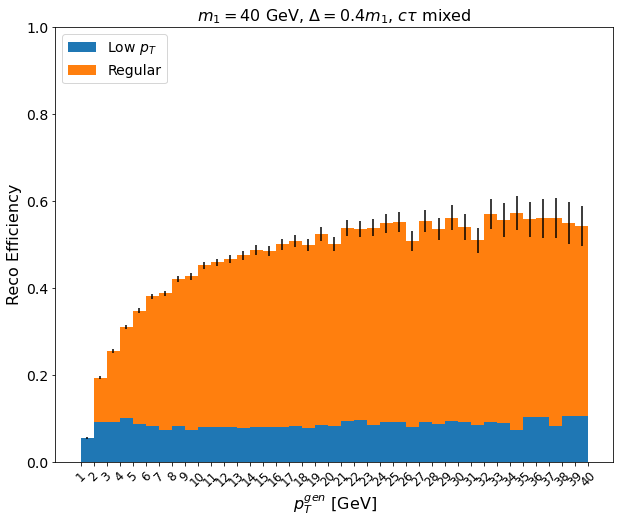

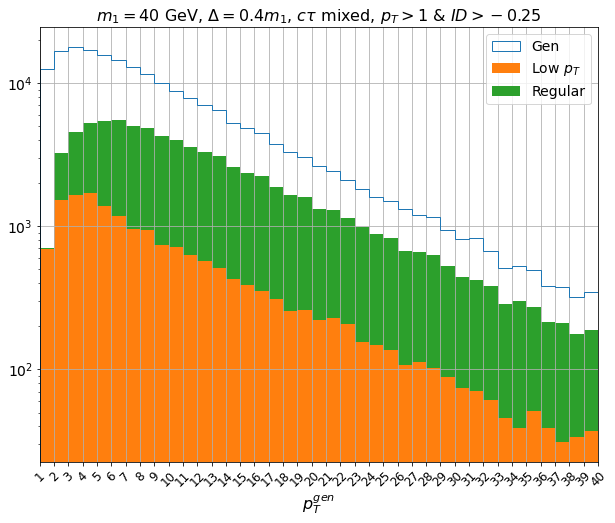

In [8]:
# eff by pT -- finer binnings
passID = (reco.pt>1) & (reco.ID>-0.25)
pt_bins = np.arange(1,41,step=1)
ngen_tot = len(allgen)
pts = []
lpt_effs = []
lpt_eff_errs = []
lpt_nevs = []
regele_effs = []
regele_eff_errs = []
regele_nevs = []
gen_nevs = []
for i in range(len(pt_bins)-1):
    lpt_filt = passID & (gen.pt > pt_bins[i]) & (gen.pt < pt_bins[i+1])
    reg_filt = (gen2.pt > pt_bins[i]) & (gen2.pt < pt_bins[i+1])
    
    gen_filt = (allgen.pt > pt_bins[i]) & (allgen.pt < pt_bins[i+1])
    ngen = ak.count_nonzero(gen_filt)
    n_lpt = ak.count_nonzero(lpt_filt)
    n_regele = ak.count_nonzero(reg_filt)
    
    gen_nevs.append(ngen)
    lpt_nevs.append(n_lpt)
    regele_nevs.append(n_regele)
    
    pts.append((pt_bins[i]+pt_bins[i+1])/2)
    
    lpt_effs.append(n_lpt/ngen)
    lpt_eff_errs.append(lpt_effs[-1]*np.sqrt(1/n_lpt + 1/ngen))
    
    regele_effs.append(n_regele/ngen)
    regele_eff_errs.append(regele_effs[-1]*np.sqrt(1/n_regele + 1/ngen))
    
plt.figure(figsize=(10,8))
tot_errs_lpt = np.sqrt(np.array(lpt_eff_errs)**2 + np.array(regele_eff_errs)**2)
plt.bar(pts,lpt_effs,label=r"Low $p_T$",width=np.array(pt_bins[1:])-np.array(pt_bins[:-1]))
plt.bar(pts,regele_effs,label="Regular",width=np.array(pt_bins[1:])-np.array(pt_bins[:-1]),bottom=lpt_effs,yerr=tot_errs_lpt)
plt.yticks(fontsize=14)
plt.xticks(ticks=pt_bins,fontsize=12,rotation=45)
plt.ylim([0,1])
plt.xlabel(r"$p_T^{gen}$ [GeV]",fontsize=16)
plt.ylabel("Reco Efficiency",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.savefig("plots/lowpt_performance/reco_eff_by_pt_fine.pdf")

plt.figure(figsize=(10,8))
h = plt.hist(allgen.pt,bins=pt_bins,label="Gen",histtype='step')
h2 = plt.hist([gen.pt[passID],gen2.pt],bins=pt_bins,label=[r"Low $p_T$","Regular"],stacked=True)
plt.xlim((pt_bins[0],pt_bins[-1]))
plt.xticks(pt_bins,fontsize=12,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T^{gen}$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/gen_pT_fine.pdf")

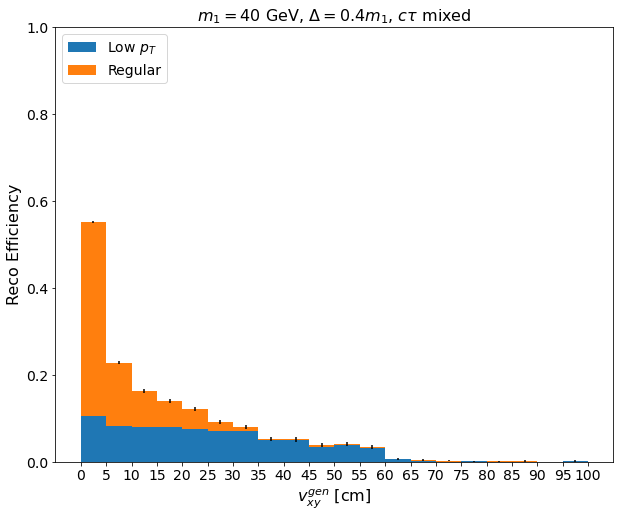

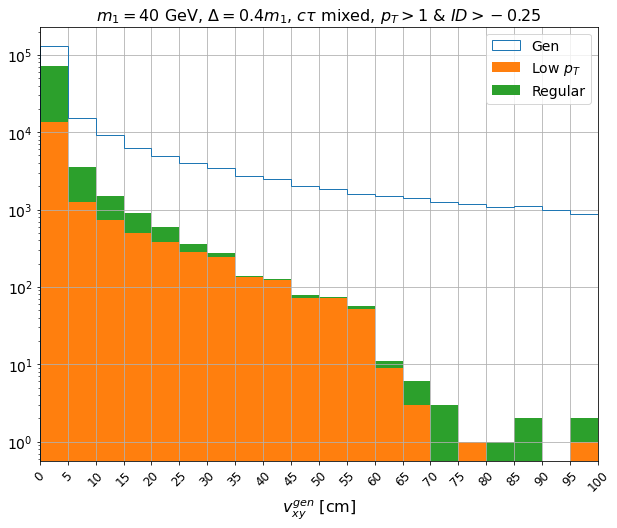

In [9]:
passID = (reco.pt>1) & (reco.ID>-0.25)
vxy_bins = np.arange(0,105,step=5)
ngen_tot = len(allgen)
vxys = []
lpt_effs = []
lpt_eff_errs = []
regele_effs = []
regele_eff_errs = []
for i in range(len(vxy_bins)-1):
    lpt_filt = passID & (gen.vxy > vxy_bins[i]) & (gen.vxy < vxy_bins[i+1])
    reg_filt = (gen2.vxy > vxy_bins[i]) & (gen2.vxy < vxy_bins[i+1])
    
    gen_filt = (allgen.vxy > vxy_bins[i]) & (allgen.vxy < vxy_bins[i+1])
    ngen = ak.count_nonzero(gen_filt)
    n_lpt = ak.count_nonzero(lpt_filt)
    n_regele = ak.count_nonzero(reg_filt)
    
    vxys.append((vxy_bins[i]+vxy_bins[i+1])/2)
    
    if ngen>0:
        lpt_effs.append(n_lpt/ngen)
        regele_effs.append(n_regele/ngen)
        lpt_eff_errs.append(lpt_effs[-1]*np.sqrt(1/n_lpt + 1/ngen) if n_lpt>0 else 0)
        regele_eff_errs.append(regele_effs[-1]*np.sqrt(1/n_regele + 1/ngen) if n_regele>0 else 0)
    else:
        lpt_effs.append(0)
        regele_effs.append(0)
        lpt_eff_errs.append(0)
        regele_eff_errs.append(0)
    
plt.figure(figsize=(10,8))
tot_errs_lpt = np.sqrt(np.array(lpt_eff_errs)**2 + np.array(regele_eff_errs)**2)
plt.bar(vxys,lpt_effs,label=r"Low $p_T$",width=np.array(vxy_bins[1:])-np.array(vxy_bins[:-1]))
plt.bar(vxys,regele_effs,label="Regular",width=np.array(vxy_bins[1:])-np.array(vxy_bins[:-1]),bottom=lpt_effs,yerr=tot_errs_lpt)
plt.yticks(fontsize=14)
plt.xticks(ticks=vxy_bins,fontsize=14)
plt.ylim([0,1])
plt.xlabel(r"$v_{xy}^{gen}$ [cm]",fontsize=16)
plt.ylabel("Reco Efficiency",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.savefig("plots/lowpt_performance/reco_eff_by_vxy.pdf")

plt.figure(figsize=(10,8))
h = plt.hist(allgen.vxy,bins=vxy_bins,label="Gen",histtype='step')
h2 = plt.hist([gen.vxy[passID],gen2.vxy],bins=vxy_bins,label=[r"Low $p_T$","Regular"],stacked=True)
plt.xlim((vxy_bins[0],vxy_bins[-1]))
plt.xticks(vxy_bins,fontsize=12,rotation=45)
plt.yticks(fontsize=14)
plt.xlabel(r"$v_{xy}^{gen}$ [cm]",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
plt.grid()
plt.savefig("plots/lowpt_performance/gen_vxy.pdf")

/uscms_data/d3/sbrightt/miniforge/envs/coffea/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/uscms_data/d3/sbrightt/miniforge/envs/coffea/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


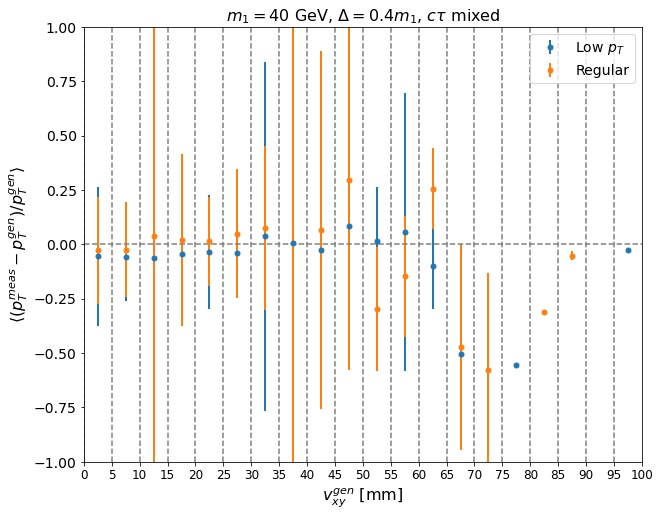

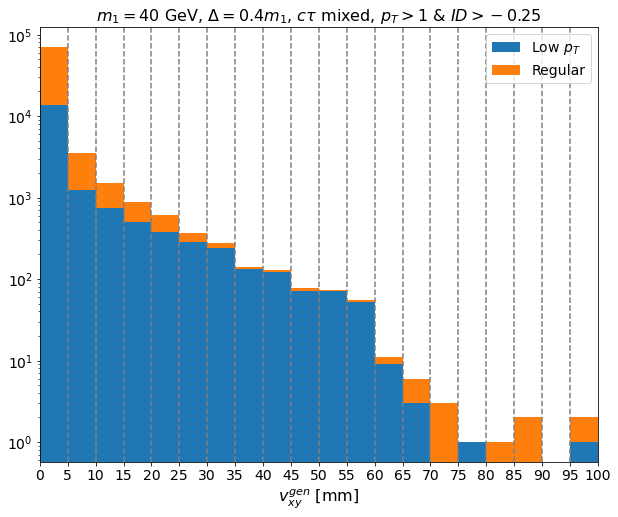

In [10]:
passID = (reco.pt>1) & (reco.ID>-0.25)
plt.figure(figsize=(10,8))
vxy_bins = np.arange(0,105,step=5)
vxys = [] 
lpt_stds = []
reg_stds = []
lpt_means = []
reg_means = []
lpt_nevs = []
reg_nevs = []
for i in range(len(vxy_bins)-1):
    lpt_filt = passID & (gen.vxy > vxy_bins[i]) & (gen.vxy < vxy_bins[i+1])
    reg_filt = (gen2.vxy > vxy_bins[i]) & (gen2.vxy < vxy_bins[i+1])
    vxys.append((vxy_bins[i]+vxy_bins[i+1])/2)
    lpt_diff = (reco.pt[lpt_filt]-gen.pt[lpt_filt])/gen.pt[lpt_filt]
    reg_diff = (reco2.pt[reg_filt]-gen2.pt[reg_filt])/gen2.pt[reg_filt]
    lpt_means.append(ak.mean(lpt_diff))
    reg_means.append(ak.mean(reg_diff))
    lpt_stds.append(ak.std(lpt_diff))
    reg_stds.append(ak.std(reg_diff))
    lpt_nevs.append(ak.count_nonzero(lpt_filt))
    reg_nevs.append(ak.count_nonzero(reg_filt))
plt.errorbar(np.array(vxys),lpt_means,lpt_stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label=r"Low $p_T$")
plt.errorbar(np.array(vxys),reg_means,reg_stds,linewidth=0,elinewidth=2,markersize=5,marker='o',label="Regular")
plt.xticks(vxy_bins,fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(r"$v_{xy}^{gen}$ [mm]",fontsize=16)
plt.ylabel(r"$\langle (p_T^{meas} - p_T^{gen})/p_T^{gen} \rangle$",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
plt.xlim((vxy_bins[0],vxy_bins[-1]))
plt.ylim([-1,1])
for binedge in vxy_bins[:-1]:
    plt.axvline(binedge,linestyle="--",color='gray')
plt.axhline(0,linestyle='--',color='gray')
plt.legend(loc='upper right',fontsize=14)
plt.savefig("plots/lowpt_performance/ptRes_vxyBinned.pdf")

plt.figure(figsize=(10,8))
h = plt.hist([gen.vxy[passID],gen2.vxy],bins=vxy_bins,label=[r"Low $p_T$","Regular"],stacked=True)
plt.xlim((vxy_bins[0],vxy_bins[-1]))
for binedge in vxy_bins[:-1]:
    plt.axvline(binedge,linestyle="--",color='gray')
plt.xticks(vxy_bins,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$v_{xy}^{gen}$ [mm]",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed, $p_T > 1$ & $ID > -0.25$",fontsize=16)
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
#plt.savefig("plots/lowpt_performance/regVsLowPt_binned_pt_dist_withReg.pdf")

# 2D efficiencies binned in $p_T$ and $v_{xy}$

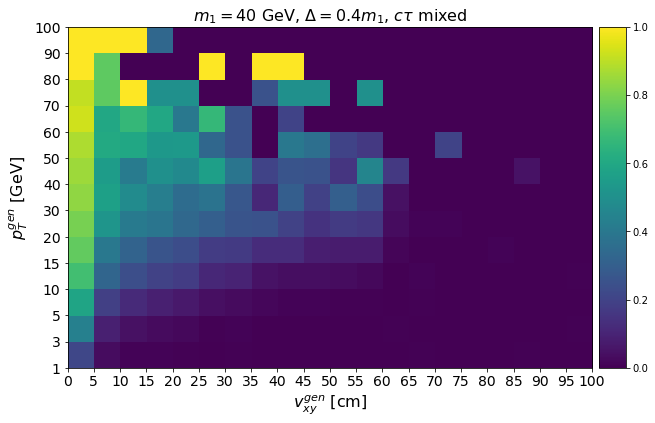

In [11]:
pt_bins = [1,3,5,10,15,20,30,40,50,60,70,80,90,100]
vxy_bins = np.arange(0,105,step=5)

effs = []
eff_errs = []
for i in range(len(vxy_bins)-1):
    effs.append([])
    eff_errs.append([])
    for j in range(len(pt_bins)-1):
        vxylo,vxyhi = vxy_bins[i], vxy_bins[i+1]
        ptlo,pthi = pt_bins[j], pt_bins[j+1]
        lpt_filt = passID & (gen.vxy > vxylo) & (gen.vxy < vxyhi) & (gen.pt > ptlo) & (gen.pt < pthi)
        reg_filt = (gen2.vxy > vxylo) & (gen2.vxy < vxyhi) & (gen2.pt > ptlo) & (gen2.pt < pthi)
        gen_filt = (allgen.vxy > vxylo) & (allgen.vxy < vxyhi) & (allgen.pt > ptlo) & (allgen.pt < pthi)
        
        num = ak.count_nonzero(lpt_filt) + ak.count_nonzero(reg_filt)
        den = ak.count_nonzero(gen_filt)
        if num > 0 and den > 0:
            effs[-1].append(num/den)
            eff_errs[-1].append((num/den)*np.sqrt(1/num + 1/den))
        else:
            effs[-1].append(0)
            eff_errs[-1].append(0)

from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(figsize=(10,8))
im = plt.imshow(np.array(effs).T,origin='lower',extent=(0,len(vxy_bins)-1,0,len(pt_bins)-1))
plt.xticks(np.arange(0,len(vxy_bins)),labels=[str(k) for k in vxy_bins],fontsize=14)
plt.yticks(np.arange(0,len(pt_bins)),labels=[str(k) for k in pt_bins],fontsize=14)
plt.xlabel(r"$v_{xy}^{gen}$ [cm]",fontsize=16)
plt.ylabel(r"$p_T^{gen}$ [GeV]",fontsize=16)
plt.title(r"$m_1 = 40$ GeV, $\Delta = 0.4m_1$, $c\tau$ mixed",fontsize=16)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im,cax=cax)
plt.savefig("plots/lowpt_performance/effGrid_vxy_vs_pt.pdf")

# Granular vxy efficiency (low vxy)

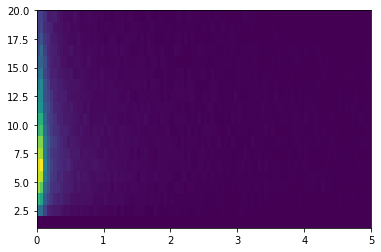

In [12]:
vxy_bins = np.arange(0,5.05,step=0.05)
pt_bins = np.arange(1,21,step=1)
c1,x1,y1,i1 = plt.hist2d(gen.vxy,gen.pt,bins=(vxy_bins,pt_bins))
c2,x2,y1,i2 = plt.hist2d(allgen.vxy,allgen.pt,bins=(vxy_bins,pt_bins))
c3,x3,y3,i3 = plt.hist2d(gen2.vxy,gen2.pt,bins=(vxy_bins,pt_bins))

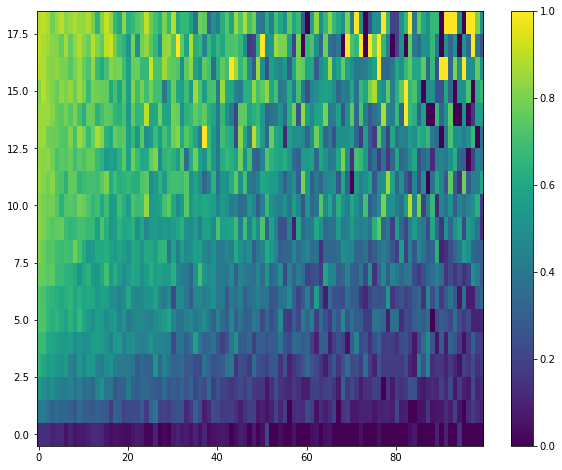

In [13]:
plt.figure(figsize=(10,8))
plt.imshow(((c1+c3)/c2).T,origin='lower',aspect='auto')
plt.colorbar()